In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR7cOF5NSArcxNxYjzDjjTnFNmG-l0zM8WqabuCqNmwKke7VTEMKjR1BamqigAFeRCvbhCylaspQpTG/pub?gid=0&single=true&output=csv'
approval = pd.read_csv(url)
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,immigration,Morning Consult,10/24/2025,10/26/2025,2202,RV,51.0,41.0,10.0,https://pro.morningconsult.com/trackers/donald...,NaN,Online Opt-In Panel,False,NaN,NaN,NaN
1277,economy,Morning Consult,10/24/2025,10/26/2025,2202,RV,43.0,48.0,-5.0,https://pro.morningconsult.com/trackers/donald...,NaN,Online Opt-In Panel,False,NaN,NaN,NaN
1278,trade_tariffs,Morning Consult,10/24/2025,10/26/2025,2202,RV,42.0,47.0,-5.0,https://pro.morningconsult.com/trackers/donald...,NaN,Online Opt-In Panel,False,NaN,NaN,NaN
1279,immigration,"Normington, Petts & Associates",09/11/2025,09/16/2025,800,LV,51.0,49.0,2.0,https://www.thirdway.org/memo/americans-caught...,Third Way,NaN,False,Immigration enforcement & ICE raids,NaN,NaN


In [4]:
approval.to_csv('president-issue-approval-polling.csv')

In [5]:
approval[approval['issue']=='economy'].shape

(208, 16)

In [6]:
approval['sponsor'] = approval['sponsor'].fillna('na')

In [7]:
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,immigration,Morning Consult,10/24/2025,10/26/2025,2202,RV,51.0,41.0,10.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN
1277,economy,Morning Consult,10/24/2025,10/26/2025,2202,RV,43.0,48.0,-5.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN
1278,trade_tariffs,Morning Consult,10/24/2025,10/26/2025,2202,RV,42.0,47.0,-5.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN
1279,immigration,"Normington, Petts & Associates",09/11/2025,09/16/2025,800,LV,51.0,49.0,2.0,https://www.thirdway.org/memo/americans-caught...,Third Way,NaN,False,Immigration enforcement & ICE raids,NaN,NaN


In [8]:
ratings = pd.read_csv('pollster_ratings_silver.csv')
ratings

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
0,AtlasIntel,A+@@1,-0.957740,D+0.16@@0.16334188,91,D+
1,Marquette University Law School,A/B@@4,-0.920261,D+0.32@@0.31545374,17,D+
2,The Washington Post,A+@@1,-0.902281,D+0.90@@0.89811021,98,D+
3,Research & Polling Inc.,A@@2,-0.871136,R+0.55@@-0.54944503,44,R+
4,The New York Times/Siena College,A@@2,-0.763947,D+1.41@@1.4121077,116,D+
...,...,...,...,...,...,...
530,Nielson Brothers Polling,C/D@@12,1.946864,D+3.05@@3.0515239,11,D+
531,Ascend Action,C/D@@12,2.282717,D+3.35@@3.3485439,6,D+
532,Jayhawk Consulting Services,C/D@@12,2.353968,D+2.27@@2.2674108,2,D+
533,Fort Hays State University,C/D@@12,2.489170,R+1.10@@-1.0960908,6,R+


In [9]:
ratings[ratings['Pollster']=='Hart Research Associates/Public Opinion Strategies']

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
31,Hart Research Associates/Public Opinion Strate...,B+@@5,-0.250934,D+0.85@@0.85034752,37,D+


In [10]:
# approval[approval['pollster']=='Hart Research Associates/Public Opinion Strategies']

In [11]:
banned_pollsters = ratings[ratings['Grade'].str.contains('F')]['Pollster'].values
banned_pollsters

array(['Strategic Vision LLC', 'Pharos Research Group', 'Research 2000',
       'Big Data Poll', 'Overtime Politics', 'Rethink Priorities',
       'Blumenthal Research Daily', 'CSP Polling', 'KG Polling',
       'OurProgress (The Progress Campaign)', 'TCJ Research'],
      dtype=object)

In [12]:
approval = approval[~approval['pollster'].isin(banned_pollsters)]
approval.shape

(1281, 16)

In [13]:
approval['pollster'].value_counts()

pollster
YouGov                                                379
Ipsos                                                 151
Morning Consult                                        96
AtlasIntel                                             68
Quinnipiac University                                  62
Verasight                                              57
Harris Insights & Analytics                            43
Echelon Insights                                       38
AP-NORC                                                31
Beacon Research/Shaw & Co. Research                    29
RMG Research                                           26
Gallup                                                 26
Hart Research Associates/Public Opinion Strategies     26
Marquette University Law School                        23
SSRS                                                   23
Clarity Campaign Labs                                  22
High Point University                                  21
Pew R

In [14]:
approval = pd.merge(left=approval, right=ratings[['Pollster', 'Predictive Plus-Minus']], left_on='pollster',
                   right_on='Pollster', how='left')
approval

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus
0,economy,Ipsos,03/31/2025,04/02/2025,1486,A,37.0,52.0,-15.0,https://www.ipsos.com/sites/default/files/ct/n...,Reuters,Probability Panel,False,NaN,NaN,NaN,Ipsos,0.442898
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635
3,economy,Harris Insights & Analytics,03/26/2025,03/27/2025,2746,RV,45.0,55.0,-10.0,https://harvardharrispoll.com/wp-content/uploa...,Harvard CAPS,Online Opt-In Panel,False,NaN,NaN,NaN,Harris Insights & Analytics,0.162447
4,economy,J.L. Partners,03/25/2025,03/27/2025,1001,RV,45.0,55.0,-10.0,https://www.dailymail.co.uk/news/article-14547...,Daily Mail,Online Opt-In Panel,False,NaN,NaN,NaN,J.L. Partners,0.197911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,immigration,Morning Consult,10/24/2025,10/26/2025,2202,RV,51.0,41.0,10.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN,Morning Consult,0.584994
1277,economy,Morning Consult,10/24/2025,10/26/2025,2202,RV,43.0,48.0,-5.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN,Morning Consult,0.584994
1278,trade_tariffs,Morning Consult,10/24/2025,10/26/2025,2202,RV,42.0,47.0,-5.0,https://pro.morningconsult.com/trackers/donald...,na,Online Opt-In Panel,False,NaN,NaN,NaN,Morning Consult,0.584994
1279,immigration,"Normington, Petts & Associates",09/11/2025,09/16/2025,800,LV,51.0,49.0,2.0,https://www.thirdway.org/memo/americans-caught...,Third Way,NaN,False,Immigration enforcement & ICE raids,NaN,NaN,NaN,NaN


In [15]:
approval['pollster'].value_counts()

pollster
YouGov                                                379
Ipsos                                                 151
Morning Consult                                        96
AtlasIntel                                             68
Quinnipiac University                                  62
Verasight                                              57
Harris Insights & Analytics                            43
Echelon Insights                                       38
AP-NORC                                                31
Beacon Research/Shaw & Co. Research                    29
RMG Research                                           26
Gallup                                                 26
Hart Research Associates/Public Opinion Strategies     26
Marquette University Law School                        23
SSRS                                                   23
Clarity Campaign Labs                                  22
High Point University                                  21
Pew R

In [16]:
auxiliary = pd.read_csv('auxiliary_pollster_rating_stats.csv')
auxiliary

,Pollster,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat
0,AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+
1,The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+
2,Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+
3,The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+
4,Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+
...,...,...,...,...,...,...,...,...
93,Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+
94,Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+
95,Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+
96,McLaughlin & Associates,0.689655,34.5%@@65.517241,R+4.94@@-4.9392128,6.2@@6.17804,0.000000,1,R+


In [17]:
# house_eff = auxiliary['House effect'].str.extract(r'(\w)\+(\d\.\d\d)@@*.')
house_eff = auxiliary['House effect'].str.extract(r'(\w)\+\d.\d\d.*@@([\d\.\+\-]+)')
house_eff[1] = house_eff[1].astype(float)
house_eff

,0,1
0,R,-1.999072
1,D,1.017374
2,D,0.632896
3,D,0.791334
4,R,-0.597041
...,...,...
93,R,-2.443137
94,R,-0.446172
95,R,-3.234717
96,R,-4.939213


In [18]:
# R --> -1, D --> 1
house_eff[0] = house_eff[0].replace({'R':-1, 'D':1})
house_eff['house_effect'] = house_eff[1]
house_eff

,0,1,house_effect
0,-1,-1.999072,-1.999072
1,1,1.017374,1.017374
2,1,0.632896,0.632896
3,1,0.791334,0.791334
4,-1,-0.597041,-0.597041
...,...,...,...
93,-1,-2.443137,-2.443137
94,-1,-0.446172,-0.446172
95,-1,-3.234717,-3.234717
96,-1,-4.939213,-4.939213


In [19]:
auxiliary['house_effect'] = house_eff['house_effect']
auxiliary = auxiliary.set_index(['Pollster'])
auxiliary

,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat,house_effect
Pollster,,,,,,,,
AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+,-1.999072
The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+,1.017374
Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+,0.632896
The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+,0.791334
Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+,-0.597041
...,...,...,...,...,...,...,...,...
Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+,-2.443137
Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+,-0.446172
Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+,-3.234717


In [20]:
def apply_house_eff(data, pollster):
    df = data[data['pollster']==pollster]
    try:
        df['approve_adj'] = df['approve'] + (auxiliary.loc[pollster, 'house_effect'] / 2)
        df['disapprove_adj'] = df['disapprove'] - (auxiliary.loc[pollster, 'house_effect'] / 2)
    except KeyError:
        df['approve_adj'] = df['approve']
        df['disapprove_adj'] = df['disapprove']
    return df

In [21]:
pollsters = approval['pollster'].value_counts().index.values
df_adjs = []
for p in pollsters:
    df = apply_house_eff(approval, p)
    df_adjs.append(df)

approval_adj = pd.concat(df_adjs, axis=0)
approval_adj

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,sponsor,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,CBS News,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,48.249587,51.750413
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,The Economist,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,43.249587,53.750413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,govt_shutdown,Hart Research,10/17/2025,10/19/2025,1221,LV,36.0,55.0,-19.0,https://senatemajority.com/wp-content/uploads/...,Senate Majority PAC,Online Opt-In Panel,False,NaN,DEM,NaN,NaN,NaN,36.000000,55.000000
146,economy,OH Predictive Insights,04/15/2025,04/18/2025,2527,RV,43.0,54.0,-11.0,https://bloximages.newyork1.vip.townnews.com/t...,Center Square,Online Opt-In Panel/Text-to-Web,False,NaN,NaN,NaN,OH Predictive Insights,-0.225885,44.064800,52.935200
854,epstein_files,McLaughlin & Associates,07/21/2025,07/24/2025,2000,RV,23.3,55.7,-32.4,https://americasnewmajorityproject.com/wp-cont...,America's New Majority Project,Online Opt-In Panel,False,NaN,REP,NaN,McLaughlin & Associates,1.412199,20.830394,58.169606
345,immigration,The Washington Post,06/10/2025,06/10/2025,1015,A,37.0,52.0,-15.0,https://www.washingtonpost.com/documents/e75c5...,na,Probability Panel,False,NaN,NaN,NaN,The Washington Post,-0.902281,37.508687,51.491313


In [22]:
approval = approval_adj.copy()
# approval.head()

In [23]:
approval['pollster'].value_counts()

pollster
YouGov                                                379
Ipsos                                                 151
Morning Consult                                        96
AtlasIntel                                             68
Quinnipiac University                                  62
Verasight                                              57
Harris Insights & Analytics                            43
Echelon Insights                                       38
AP-NORC                                                31
Beacon Research/Shaw & Co. Research                    29
RMG Research                                           26
Gallup                                                 26
Hart Research Associates/Public Opinion Strategies     26
Marquette University Law School                        23
SSRS                                                   23
Clarity Campaign Labs                                  22
High Point University                                  21
Pew R

In [24]:
approval[approval['issue']=='economy'].shape

(208, 20)

In [25]:
approval['poll_id'] = pd.factorize(approval['pollster'] + approval['end_date'] + approval['sponsor'] + approval['issue'])[0]
approval.head(7)

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,mode,tracking,wording_notes,partisan,other_notes,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj,poll_id
1,economy,YouGov,04/05/2025,04/08/2025,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413,0
2,economy,YouGov,03/27/2025,03/28/2025,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,48.249587,51.750413,1
5,economy,YouGov,04/13/2025,04/15/2025,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413,2
6,economy,YouGov,04/13/2025,04/15/2025,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413,2
10,economy,YouGov,04/19/2025,04/22/2025,1625,A,43.0,54.0,-11.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,43.249587,53.750413,3
17,economy,YouGov,04/25/2025,04/28/2025,1785,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,41.249587,50.750413,4
18,economy,YouGov,02/26/2025,02/28/2025,2311,A,51.0,49.0,2.0,https://www.cbsnews.com/news/trump-elon-musk-g...,...,Online Matched Sample,False,NaN,NaN,NaN,YouGov,0.047635,51.249587,48.750413,5


In [26]:
approval['pollster_id'] = pd.factorize(approval['pollster'] + approval['sponsor'].fillna('none'))[0]

In [27]:
def pipeline(data: pd.DataFrame):
    dup = data[data.duplicated(subset='poll_id')]
    ndup = data[~data.duplicated(subset='poll_id')]
    dup_a = dup[dup['population'].isin(['A'])]
    df = pd.concat([dup_a, ndup], axis=0)
    
    dup = df[df.duplicated(subset='poll_id')]
    ndup = df[~df.duplicated(subset='poll_id')]
    dup_lv = dup[dup['population'].isin(['RV'])]
    df = pd.concat([dup_lv, ndup], axis=0)
    
#     try:
    df['end_date'] = pd.to_datetime(df['end_date'])
#     except ValueError:
#         print(df['end_date'])
#         raise ValueError()
    df['start_date'] = pd.to_datetime(df['start_date'])
    
    return df

In [28]:
approval['poll_id'].value_counts().index.values.shape

(1274,)

In [29]:
approval = approval.rename({'Predictive Plus-Minus':'pred_plus_minus'}, axis=1)

In [30]:
banned_pollsters_aux = pd.read_csv('banned_pollsters_aux.csv')['banned_pollsters'].values
banned_pollsters_aux

array(['Rasmussen Reports', 'TIPP Insights', 'Trafalgar Group',
       'Trafalgar Group/Insider Advantage'], dtype=object)

In [31]:
approval = approval[~approval['pollster'].isin(banned_pollsters_aux)]
approval = pipeline(approval)
approval.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,tracking,wording_notes,partisan,other_notes,Pollster,pred_plus_minus,approve_adj,disapprove_adj,poll_id,pollster_id
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,45.249587,50.750413,2,0
116,inflation,YouGov,2025-04-13,2025-04-15,1329,RV,42.0,55.0,-13.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,54.750413,40,0
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,42.249587,48.750413,2,0
121,inflation,YouGov,2025-04-13,2025-04-15,1512,A,37.0,55.0,-18.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,False,NaN,NaN,NaN,YouGov,0.047635,37.249587,54.750413,40,0
1264,economy,Ipsos,2025-10-15,2025-10-20,4385,A,35.0,53.0,-18.0,https://www.reuters.com/world/us/trumps-approv...,...,False,NaN,NaN,NaN,Ipsos,0.442898,35.387369,52.612631,522,5


In [32]:
approval['pollster'].value_counts()

pollster
YouGov                                                379
Ipsos                                                 149
Morning Consult                                        95
AtlasIntel                                             68
Quinnipiac University                                  60
Verasight                                              57
Harris Insights & Analytics                            43
Echelon Insights                                       38
AP-NORC                                                31
Beacon Research/Shaw & Co. Research                    29
RMG Research                                           26
Gallup                                                 26
Hart Research Associates/Public Opinion Strategies     26
Marquette University Law School                        23
SSRS                                                   23
Clarity Campaign Labs                                  22
High Point University                                  21
Pew R

In [33]:
approval[approval['issue']=='economy'].shape

(206, 22)

In [34]:
approval.shape

(1276, 22)

In [35]:
# Drop unnecessary columns
approval = approval.drop(['mode', 'tracking', 'partisan', 'wording_notes'], axis='columns')

In [36]:
def zone_flood_checker(data, pid, date):
    """
    Check whether there are multiple polls from the same pollster + same sponsor (if applicable) within the last two weeks, 
    which could indicate "flooding the zone." Return number of polls from same pollster/sponsor in last two weeks.

    :param data: Polls dataframe.
    :param pid: Pollster ID, specified in the polls dataframe as the column pollster_id.
    :param date: Date at which specified poll is conducted. Corresponds to column end_date in polls dataframe.
    """
    thres = date - pd.Timedelta(weeks=2)
    df = data[ (data['pollster_id'] == pid) & (pd.to_datetime(data['end_date']) >= thres) ]
    return max(df.shape[0], 1)

In [37]:
def avgs_pipeline(data: pd.DataFrame, date: datetime.date, issue: str):
    state_pivot = pipeline(data)
    # state_pivot['end_date'] = pd.to_datetime(state_pivot['end_date'])
    # state_pivot['pred_plus_minus'] = state_pivot['pred_plus_minus'].map(lambda x: -x)
    state_pivot = state_pivot[state_pivot['end_date'] <= pd.to_datetime(date)]
    state_pivot['population'] = state_pivot['population'].astype(str).map(lambda x: x.strip())
    state_pivot = state_pivot[state_pivot['issue'] == issue]
    
    total_num_polls = state_pivot.shape[0]

    # Sample size weights
    total_sample_size = np.sum(state_pivot['sample_size'])
    state_pivot['sample_size_weights'] = (state_pivot['sample_size'].map(lambda x: np.sqrt(min(x, 3000))) / np.sqrt(np.median(state_pivot['sample_size'].map(lambda x: min(x, 2000)))))
    # print(np.median(state_pivot['sample_size'].map(lambda x: min(x, 5000))))
    state_pivot['sample_size_weights'] /= np.sum(state_pivot['sample_size_weights'])
    
    # Time weights
    # Variation of the equation used here: https://polls.votehub.us/
    latest_date = pd.Timestamp(date)
    delta = state_pivot['end_date'].apply(lambda x: (latest_date - x).days)# (latest_date - state_pivot['end_date']).apply(lambda x: x.days)
    # linear_weights = (1 - delta/((latest_date - state_pivot['end_date'].min()).days + 1))
    linear_weights = delta.map(lambda x: (1 - x/45) if x < 45 else 0)
#     except TypeError:
#         print('TypeError')
#         print(type(delta))
#         print(type((latest_date - state_pivot['end_date'].min()).days))
    exp_weights = 0.1**(delta/(35))
    state_pivot['time_weights'] =  0.1 * linear_weights + 0.9 * exp_weights
    # state_pivot['time_weights'] /= np.sum(state_pivot['time_weights'])
    
    # Quality weights
    rel_quality = state_pivot['pred_plus_minus']
    def quality_weight(rel_qual):
        if np.isnan(rel_qual):
            return 0.2
        if rel_qual > 0.5: # Utilizing predictive plus-minus from Silver Bulletin's ratings
            return 0.2
        # return np.sqrt( (-rel_qual+1)/2.4 ) + 0.2
        return np.exp(-rel_qual/1.3)
    state_pivot['quality_weights'] = rel_quality.map(quality_weight)
    # state_pivot['quality_weights'] /= np.sum(state_pivot['quality_weights'])
    
    # Population weights
    def population_weight(population):
        if population == 'RV':
            return 0.8
        elif population == 'LV':
            return 0.6
        return 1
    state_pivot['population_weights'] = state_pivot['population'].map(population_weight)

    
    # Multiple polls in short window (aka "flooding the zone")
    def zone_flood_weight(pid, date):
        num_polls = zone_flood_checker(approval, pid, date)
        return 1 / np.sqrt(num_polls)
    state_pivot['zone_flood_weight'] = state_pivot[['pollster_id', 'end_date']].apply(
        lambda x: zone_flood_weight(x['pollster_id'], x['end_date']),
        axis=1
    )

    # Gather the weights together
    state_pivot['total_weights'] = (state_pivot['sample_size_weights'] * state_pivot['time_weights'] * 
                                    state_pivot['quality_weights'] * state_pivot['population_weights'] * state_pivot['zone_flood_weight'])
    state_pivot['total_weights'] /= np.sum(state_pivot['total_weights']) # Normalization step
    
    return state_pivot

In [38]:
avgs_pipeline(approval, datetime.datetime.today(), 'inflation')['end_date'].min()

Timestamp('2025-01-21 00:00:00')

In [39]:
approval['end_date']

5      2025-04-15
116    2025-04-15
6      2025-04-15
121    2025-04-15
1264   2025-10-20
          ...    
1275   2025-10-19
146    2025-04-18
854    2025-07-24
345    2025-06-10
1279   2025-09-16
Name: end_date, Length: 1276, dtype: datetime64[ns]

In [40]:
def approval_over_time(data: pd.DataFrame, min_date: datetime.date, issue: str):
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    for date in tqdm(date_range):
#         try:
        pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
        yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
        no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
        yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
        no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
        yes_averages.append(yes_avg)
        no_averages.append(no_avg)
        yes_stdevs.append(yes_std)
        no_stdevs.append(no_std)
        issue_col.append(issue)
    
    return pd.DataFrame({'Date':date_range, 'approve_mean':yes_averages, 'disapprove_mean':no_averages, 'Issue':issue_col, 'approve_std':yes_stdevs, 'disapprove_std':no_stdevs}), avgs_pipeline(data, datetime.datetime.today(), issue)

In [41]:
issues = ['economy', 'immigration', 'foreign_policy', 'inflation', 'trade_tariffs', 'healthcare', 'crime']

In [42]:
approval_avg_econ, polls_df_econ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')
approval_avg_econ

100%|████████████████████████████████████████████████████████████████████████████████| 281/281 [01:51<00:00,  2.53it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000
2,2025-01-23,48.079959,47.136156,economy,2.289117,4.633865
3,2025-01-24,48.079773,47.135780,economy,2.289311,4.634258
4,2025-01-25,48.079593,47.135414,economy,2.289499,4.634638
...,...,...,...,...,...,...
276,2025-10-24,38.870457,55.662977,economy,3.133545,3.448439
277,2025-10-25,38.866469,55.663826,economy,3.131906,3.447390
278,2025-10-26,38.457914,55.709853,economy,3.319232,3.480948
279,2025-10-27,38.172029,55.801398,economy,3.295935,3.336747


In [43]:
# line = px.line(approval_avg_infl, x='Date', y=['Approve', 'Disapprove'])
# line.update_traces(hovertemplate=None)
# line.update_layout(hovermode='x unified')
# fig = go.Figure(data=line.data)
# fig.update_layout(
#     title='President Trump Approval Rating',
#     xaxis_title='Date',
#     yaxis_title='%',
#     legend_title='Legend',
#     hovermode='x unified'
# )
# fig.show()

In [44]:
approval_avg_imm, polls_df_imm = approval_over_time(approval, datetime.date(2025, 1, 21), 'immigration')
approval_avg_imm

100%|████████████████████████████████████████████████████████████████████████████████| 281/281 [01:30<00:00,  3.11it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,46.387369,37.612631,immigration,0.000000,0.000000
1,2025-01-22,46.387369,37.612631,immigration,0.000000,0.000000
2,2025-01-23,49.497542,48.275350,immigration,1.250670,4.287716
3,2025-01-24,49.497440,48.275002,immigration,1.250776,4.288079
4,2025-01-25,49.497342,48.274664,immigration,1.250878,4.288431
...,...,...,...,...,...,...
276,2025-10-24,45.062296,50.238378,immigration,2.891489,3.240893
277,2025-10-25,45.059466,50.236302,immigration,2.891444,3.241131
278,2025-10-26,44.992168,49.883979,immigration,2.905054,3.345700
279,2025-10-27,44.691653,50.083408,immigration,2.871929,3.211728


In [45]:
# approval_avg_imm.head(30)

In [46]:
approval_avg_fp, polls_df_fp = approval_over_time(approval, datetime.date(2025, 1, 21), 'foreign_policy')
approval_avg_fp

100%|████████████████████████████████████████████████████████████████████████████████| 281/281 [00:47<00:00,  5.85it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-21,39.387369,36.612631,foreign_policy,0.000000,0.000000
1,2025-01-22,39.387369,36.612631,foreign_policy,0.000000,0.000000
2,2025-01-23,39.387369,36.612631,foreign_policy,0.000000,0.000000
3,2025-01-24,39.387369,36.612631,foreign_policy,0.000000,0.000000
4,2025-01-25,39.387369,36.612631,foreign_policy,0.000000,0.000000
...,...,...,...,...,...,...
276,2025-10-24,43.111186,49.976895,foreign_policy,3.544953,2.696828
277,2025-10-25,43.108354,49.974606,foreign_policy,3.540405,2.694396
278,2025-10-26,43.105025,49.972206,foreign_policy,3.535348,2.691882
279,2025-10-27,43.101143,49.969689,foreign_policy,3.529725,2.689283


In [47]:
approval_avg_infl, polls_df_infl = approval_over_time(approval, datetime.date(2025, 1, 28), 'inflation')
approval_avg_infl

100%|████████████████████████████████████████████████████████████████████████████████| 274/274 [01:04<00:00,  4.28it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,41.645643,39.430922,inflation,4.749155,0.896752
1,2025-01-29,41.643964,39.431240,inflation,4.749624,0.896840
2,2025-01-30,41.642381,39.431538,inflation,4.750065,0.896924
3,2025-01-31,41.640914,39.431815,inflation,4.750474,0.897001
4,2025-02-01,41.639581,39.432067,inflation,4.750844,0.897071
...,...,...,...,...,...,...
269,2025-10-24,33.484873,62.352968,inflation,3.004220,4.220556
270,2025-10-25,33.485655,62.349520,inflation,3.002755,4.218642
271,2025-10-26,33.486487,62.345591,inflation,3.001013,4.216148
272,2025-10-27,32.990801,61.986345,inflation,2.803801,3.771964


In [48]:
approval_avg_trade, polls_df_trade = approval_over_time(approval, datetime.date(2025, 1, 28), 'trade_tariffs')
approval_avg_trade

100%|████████████████████████████████████████████████████████████████████████████████| 274/274 [01:16<00:00,  3.57it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,42.567347,38.556627,trade_tariffs,5.732739,1.448284
1,2025-01-29,42.565983,38.556972,trade_tariffs,5.732301,1.448173
2,2025-01-30,42.564717,38.557292,trade_tariffs,5.731894,1.448070
3,2025-01-31,42.563564,38.557583,trade_tariffs,5.731523,1.447977
4,2025-02-01,42.562543,38.557841,trade_tariffs,5.731194,1.447894
...,...,...,...,...,...,...
269,2025-10-24,39.206652,55.305036,trade_tariffs,3.166426,3.876937
270,2025-10-25,39.207871,55.298564,trade_tariffs,3.165812,3.872469
271,2025-10-26,39.363902,54.872076,trade_tariffs,3.163970,4.209241
272,2025-10-27,39.365583,54.862882,trade_tariffs,3.163044,4.204407


In [49]:
approval_avg_healthcare, polls_df_healthcare = approval_over_time(approval, datetime.date(2025, 1, 28), 'healthcare')
approval_avg_healthcare

100%|████████████████████████████████████████████████████████████████████████████████| 274/274 [00:26<00:00, 10.25it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,39.000464,52.999536,healthcare,0.000000,0.000000
1,2025-01-29,39.000464,52.999536,healthcare,0.000000,0.000000
2,2025-01-30,39.000464,52.999536,healthcare,0.000000,0.000000
3,2025-01-31,39.000464,52.999536,healthcare,0.000000,0.000000
4,2025-02-01,39.000464,52.999536,healthcare,0.000000,0.000000
...,...,...,...,...,...,...
269,2025-10-24,36.506364,56.606606,healthcare,4.892199,5.688310
270,2025-10-25,36.468692,56.637231,healthcare,4.876940,5.690832
271,2025-10-26,36.425889,56.671944,healthcare,4.858765,5.693265
272,2025-10-27,36.388138,56.700215,healthcare,4.836647,5.693413


In [50]:
approval_avg_crime, polls_df_crime = approval_over_time(approval, datetime.date(2025, 1, 28), 'crime')
approval_avg_crime

100%|████████████████████████████████████████████████████████████████████████████████| 274/274 [00:21<00:00, 12.73it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,48.249587,34.750413,crime,0.000000,0.000000
1,2025-01-29,48.249587,34.750413,crime,0.000000,0.000000
2,2025-01-30,48.249587,34.750413,crime,0.000000,0.000000
3,2025-01-31,48.249587,34.750413,crime,0.000000,0.000000
4,2025-02-01,48.249587,34.750413,crime,0.000000,0.000000
...,...,...,...,...,...,...
269,2025-10-24,47.296428,47.189152,crime,2.373042,2.720827
270,2025-10-25,47.303985,47.174089,crime,2.369623,2.709611
271,2025-10-26,47.312375,47.157187,crime,2.365827,2.696787
272,2025-10-27,47.321695,47.138226,crime,2.361602,2.682118


In [51]:
## NOT ADDED TO BROADER GRAPH
approval_avg_ukraine, polls_df_ukraine = approval_over_time(approval, datetime.date(2025, 1, 28), 'ukraine')
approval_avg_ukraine

100%|████████████████████████████████████████████████████████████████████████████████| 274/274 [00:20<00:00, 13.08it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,46.000464,50.999536,ukraine,0.000000,0.000000
1,2025-01-29,46.000464,50.999536,ukraine,0.000000,0.000000
2,2025-01-30,46.000464,50.999536,ukraine,0.000000,0.000000
3,2025-01-31,46.000464,50.999536,ukraine,0.000000,0.000000
4,2025-02-01,46.000464,50.999536,ukraine,0.000000,0.000000
...,...,...,...,...,...,...
269,2025-10-24,33.443029,54.240154,ukraine,3.570983,4.616149
270,2025-10-25,33.437032,54.228220,ukraine,3.570660,4.609111
271,2025-10-26,33.430371,54.214334,ukraine,3.570387,4.600666
272,2025-10-27,33.422979,54.198283,ukraine,3.570168,4.590631


In [52]:
## NOT ADDED TO BROADER GRAPH
approval_avg_pali, polls_df_pali = approval_over_time(approval, datetime.date(2025, 1, 28), 'israel_palestine')
approval_avg_pali

100%|████████████████████████████████████████████████████████████████████████████████| 274/274 [00:14<00:00, 19.08it/s]


,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std
0,2025-01-28,44.000464,52.999536,israel_palestine,0.000000,0.000000
1,2025-01-29,44.000464,52.999536,israel_palestine,0.000000,0.000000
2,2025-01-30,44.000464,52.999536,israel_palestine,0.000000,0.000000
3,2025-01-31,44.000464,52.999536,israel_palestine,0.000000,0.000000
4,2025-02-01,44.000464,52.999536,israel_palestine,0.000000,0.000000
...,...,...,...,...,...,...
269,2025-10-24,44.501902,44.850647,israel_palestine,5.351959,9.513452
270,2025-10-25,44.512956,44.832052,israel_palestine,5.345225,9.505336
271,2025-10-26,44.526083,44.809943,israel_palestine,5.337395,9.495632
272,2025-10-27,44.541510,44.783934,israel_palestine,5.328335,9.484139


In [53]:
approval_avg_issues = pd.concat([approval_avg_econ, approval_avg_imm, approval_avg_fp, approval_avg_infl, approval_avg_trade, approval_avg_healthcare,
                                approval_avg_crime], axis=0)

# 95% confidence intervals
approval_avg_issues['approve_CI_upper'] = approval_avg_issues['approve_mean'] + 1.96*approval_avg_issues['approve_std']
approval_avg_issues['approve_CI_lower'] = approval_avg_issues['approve_mean'] - 1.96*approval_avg_issues['approve_std']
approval_avg_issues['disapprove_CI_upper'] = approval_avg_issues['disapprove_mean'] + 1.96*approval_avg_issues['disapprove_std']
approval_avg_issues['disapprove_CI_lower'] = approval_avg_issues['disapprove_mean'] - 1.96*approval_avg_issues['disapprove_std']

approval_avg_issues

,Date,approve_mean,disapprove_mean,Issue,approve_std,disapprove_std,approve_CI_upper,approve_CI_lower,disapprove_CI_upper,disapprove_CI_lower
0,2025-01-21,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
1,2025-01-22,42.387369,35.612631,economy,0.000000,0.000000,42.387369,42.387369,35.612631,35.612631
2,2025-01-23,48.079959,47.136156,economy,2.289117,4.633865,52.566628,43.593290,56.218532,38.053781
3,2025-01-24,48.079773,47.135780,economy,2.289311,4.634258,52.566822,43.592724,56.218924,38.052635
4,2025-01-25,48.079593,47.135414,economy,2.289499,4.634638,52.567011,43.592175,56.219305,38.051523
...,...,...,...,...,...,...,...,...,...,...
269,2025-10-24,47.296428,47.189152,crime,2.373042,2.720827,51.947589,42.645266,52.521972,41.856332
270,2025-10-25,47.303985,47.174089,crime,2.369623,2.709611,51.948445,42.659524,52.484927,41.863252
271,2025-10-26,47.312375,47.157187,crime,2.365827,2.696787,51.949395,42.675355,52.442889,41.871484
272,2025-10-27,47.321695,47.138226,crime,2.361602,2.682118,51.950436,42.692955,52.395177,41.881275


In [54]:
approval_avg_econ = approval_avg_issues[approval_avg_issues['Issue'] == 'economy']
approval_avg_imm = approval_avg_issues[approval_avg_issues['Issue'] == 'immigration']
approval_avg_fp = approval_avg_issues[approval_avg_issues['Issue'] == 'foreign_policy']
approval_avg_infl = approval_avg_issues[approval_avg_issues['Issue'] == 'inflation']
approval_avg_trade = approval_avg_issues[approval_avg_issues['Issue'] == 'trade_tariffs']
approval_avg_healthcare = approval_avg_issues[approval_avg_issues['Issue'] == 'healthcare']
approval_avg_crime = approval_avg_issues[approval_avg_issues['Issue'] == 'crime']

In [55]:
approval_avg_econ.to_csv('approval_stats_econ.csv')
approval_avg_imm.to_csv('approval_stats_imm.csv')
approval_avg_fp.to_csv('approval_stats_fp.csv')
approval_avg_infl.to_csv('approval_stats_infl.csv')
approval_avg_trade.to_csv('approval_stats_trade.csv')
approval_avg_healthcare.to_csv('approval_stats_healthcare.csv')
approval_avg_crime.to_csv('approval_stats_crime.csv')

In [56]:
polls_df_econ.head()

,issue,pollster,start_date,end_date,sample_size,population,approve,disapprove,net,url,...,approve_adj,disapprove_adj,poll_id,pollster_id,sample_size_weights,time_weights,quality_weights,population_weights,zone_flood_weight,total_weights
5,economy,YouGov,2025-04-13,2025-04-15,1329,RV,45.0,51.0,-6.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,45.249587,50.750413,2,0,0.004534,2.260698e-06,0.964021,0.8,0.069505,4.517611e-08
6,economy,YouGov,2025-04-13,2025-04-15,1512,A,42.0,49.0,-7.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,42.249587,48.750413,2,0,0.004836,2.260698e-06,0.964021,1.0,0.069505,6.023268e-08
1264,economy,Ipsos,2025-10-15,2025-10-20,4385,A,35.0,53.0,-18.0,https://www.reuters.com/world/us/trumps-approv...,...,35.387369,52.612631,522,5,0.006812,6.139276e-01,0.711279,1.0,0.408248,9.985154e-02
1,economy,YouGov,2025-04-05,2025-04-08,1741,A,41.0,51.0,-10.0,https://d3nkl3psvxxpe9.cloudfront.net/document...,...,41.249587,50.750413,0,0,0.005190,1.426404e-06,0.964021,1.0,0.067884,3.983006e-08
2,economy,YouGov,2025-03-27,2025-03-28,2609,A,48.0,52.0,-4.0,https://www.cbsnews.com/news/opinion-poll-trum...,...,48.249587,51.750413,1,1,0.006353,6.917621e-07,0.964021,1.0,0.208514,7.263215e-08


In [57]:
polls_df_econ.columns.values

array(['issue', 'pollster', 'start_date', 'end_date', 'sample_size',
       'population', 'approve', 'disapprove', 'net', 'url', 'sponsor',
       'other_notes', 'Pollster', 'pred_plus_minus', 'approve_adj',
       'disapprove_adj', 'poll_id', 'pollster_id', 'sample_size_weights',
       'time_weights', 'quality_weights', 'population_weights',
       'zone_flood_weight', 'total_weights'], dtype=object)

In [58]:
def format_polls_display_table(polls_df):
    display_df = polls_df[['pollster', 'sponsor', 'start_date', 'end_date', 'issue', 'sample_size', 'population', 'approve', 'disapprove', 'net',
                      'total_weights', 'url']]
    display_df['sponsor'] = display_df['sponsor'].map(lambda x: ('^Sponsor: ' + x + '^') if x != 'na' else '')
    # display_df['sponsor'] = display_df['sponsor'].fillna('')
    display_df = display_df.sort_values(['end_date'], ascending=False)
    display_df = display_df.rename({'pollster':'Pollster', 'approve':'Approve', 'disapprove':'Disapprove', 'net':'Net', 'total_weights':'Weight', 'start_date':'Start Date', 'end_date':'End Date', 'url':'URL',
                                   'issue':'Issue'}, axis='columns')
    display_df['Issue'] = display_df['Issue'].replace({
        'economy':'Economy', 'immigration':'Immigration', 'inflation':'Inflation/prices', 'foreign_policy':'Foreign policy', 'trade_tariffs':'Trade/tariffs', 'healthcare':'Healthcare', 'crime':'Crime'
    })
    display_df['Sample'] = display_df['sample_size'].astype(int).astype(str) + ' ' + display_df['population']
    # display_df['end_date'] = display_df['end_date'].map(lambda x: datetime.datetime.strptime(datetime.datetime.fromtimestamp(x), '%m/%d/%Y').strftime('%Y-%m-%d'))
    # display_df['Date'] = pd.to_datetime(display_df['startdate']).astype(str) + ' - ' + display_df['end_date'].astype(str)
    display_df['Start Date'] = pd.to_datetime(display_df['Start Date']).astype(str)
    display_df['End Date'] = display_df['End Date'].astype(str)
    display_df = display_df.reset_index()
    # display_df = display_df.drop(['sample_size', 'population'], axis='columns')
    display_df['Pollster'] = '<a href="' + display_df['URL'] + '" style="color:black; text-decoration:underline;"><u>' + display_df['Pollster'] + '</u></a>' + display_df['sponsor']
    # display_df['Pollster'] = '[' + display_df['Pollster'] + '](' + display_df['URL'] + ')'
    display_df = display_df[['Pollster', 'Start Date', 'End Date', 'Issue', 'Sample', 'Weight', 'Approve', 'Disapprove', 'Net']]
    display_df = display_df.sort_values(['End Date'], ascending=False)
    # display_df = display_df.set_index(['Pollster'])
    return display_df

In [59]:
polls_display_econ = format_polls_display_table(polls_df_econ)
polls_display_imm = format_polls_display_table(polls_df_imm)
polls_display_fp = format_polls_display_table(polls_df_fp)
polls_display_infl = format_polls_display_table(polls_df_infl)
polls_display_trade = format_polls_display_table(polls_df_trade)
polls_display_healthcare = format_polls_display_table(polls_df_healthcare)
polls_display_crime = format_polls_display_table(polls_df_crime)

In [60]:
polls_display_issues = pd.concat([polls_display_econ, polls_display_imm, polls_display_fp, polls_display_infl,
                                 polls_display_trade, polls_display_healthcare, polls_display_crime], axis=0)
polls_display_issues

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
0,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-10-24,2025-10-27,Economy,1623 A,8.803772e-02,35.0,57.0,-22.0
2,"<a href=""https://www.reuters.com/world/us/trum...",2025-10-24,2025-10-26,Economy,1018 A,1.026459e-01,34.0,58.0,-24.0
1,"<a href=""https://pro.morningconsult.com/tracke...",2025-10-24,2025-10-26,Economy,2202 RV,1.960631e-02,43.0,48.0,-5.0
3,"<a href=""https://echeloninsights.com/in-the-ne...",2025-10-16,2025-10-20,Economy,1010 LV,6.324713e-02,42.0,55.0,-13.0
7,"<a href=""https://poll.qu.edu/poll-release?rele...",2025-10-16,2025-10-20,Economy,1327 RV,1.023088e-01,38.0,57.0,-19.0
...,...,...,...,...,...,...,...,...,...
32,"<a href=""https://www.ipsos.com/en-us/reutersip...",2025-02-13,2025-02-18,Crime,4125 A,1.721920e-08,42.0,40.0,2.0
33,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-16,2025-02-18,Crime,1603 A,1.138335e-08,48.0,37.0,11.0
34,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-09,2025-02-11,Crime,1595 A,7.049620e-09,45.0,41.0,4.0
35,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-02-02,2025-02-04,Crime,1604 A,4.460541e-09,48.0,35.0,13.0


In [61]:
polls_display_issues[polls_display_issues['Pollster'].str.contains('Hart')]

,Pollster,Start Date,End Date,Issue,Sample,Weight,Approve,Disapprove,Net
67,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Economy,1000 A,3.417202e-04,45.0,53.0,-8.0
165,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Economy,1000 A,1.696417e-07,45.0,51.0,-6.0
184,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Economy,1000 RV,3.172416e-08,44.0,54.0,-10.0
167,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Immigration,1000 RV,3.924912e-08,55.0,43.0,12.0
2,"<a href=""https://fm.cnbc.com/applications/cnbc...",2025-10-08,2025-10-12,Foreign policy,1000 A,2.548660e-01,43.0,51.0,-8.0
19,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Foreign policy,1000 A,1.311540e-03,41.0,55.0,-14.0
59,"<a href=""https://www.realclearpolitics.com/doc...",2025-04-09,2025-04-13,Foreign policy,1000 A,6.510939e-07,42.0,53.0,-11.0
69,"<a href=""https://www.nbcnews.com/politics/trum...",2025-03-07,2025-03-11,Foreign policy,1000 RV,1.217590e-07,45.0,53.0,-8.0
3,"<a href=""https://fm.cnbc.com/applications/cnbc...",2025-10-08,2025-10-12,Inflation/prices,1000 A,1.681646e-01,34.0,62.0,-28.0
26,"<a href=""https://pos.org/wp-content/uploads/20...",2025-07-29,2025-08-03,Inflation/prices,1000 A,8.653749e-04,37.0,60.0,-23.0


In [62]:
polls_display_issues.to_csv('polls_display_issues.csv')

In [63]:
# approval_avg_infl

In [64]:
line = px.line(approval_avg_crime, x='Date', y=['approve_mean', 'disapprove_mean'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Crime Approval Rating',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

In [65]:
line = px.line(x=approval_avg_econ['Date'], y=approval_avg_econ['approve_mean'] - approval_avg_econ['disapprove_mean'])
scatter = px.scatter(polls_df_econ[polls_df_econ['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['net'])
fig = go.Figure(data=line.data + scatter.data)
fig.add_hline(y=0, line_dash='dash')
fig.show()

In [66]:
def net_col(df: pd.DataFrame, min_date: datetime.date, issue_list: list):
#     df_copy = df.set_index(['Date'])
#     return df_copy['approve_mean'] - df_copy['disapprove_mean']
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    data = df.copy()
    data['net_adj'] = data['approve_adj'] - data['disapprove_adj']
    net_averages = []
    net_stdevs = []
    issue_cols = {'Date': date_range, 'economy_avg':[], 'foreign_policy_avg':[], 'immigration_avg':[], 'inflation_avg':[],
                 'economy_std':[], 'foreign_policy_std':[], 'immigration_std':[], 'inflation_std':[], 'trade_tariffs_avg': [],
                 'trade_tariffs_std':[], 'healthcare_avg': [], 'healthcare_std': [], 'crime_avg':[], 'crime_std':[]}
    
    for issue in issue_list:
        for date in tqdm(date_range):
    #         try:
            pipelined_df = avgs_pipeline(data, date, issue)
    #         except TypeError:
    #             print('TypeError')
    #             print(date)
            net_avg = np.sum(pipelined_df['net_adj'] * pipelined_df['total_weights'])
            net_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['net_adj'] - net_avg)**2))

            net_averages.append(net_avg)
            net_stdevs.append(net_std)

        issue_cols[f'{issue}_avg'].extend(net_averages)
        issue_cols[f'{issue}_std'].extend(net_stdevs)
        
        net_averages, net_stdevs = [], []
    
    # print(issue_cols)
    issue_df = pd.DataFrame(issue_cols)#.replace({0:2})
    
    for issue in ['economy', 'foreign_policy', 'immigration', 'inflation', 'trade_tariffs', 'healthcare', 'crime']:
        issue_df[f'{issue}_std'] = issue_df[f'{issue}_std'].replace({0: 2})
        issue_df[f'{issue}_upper_CI'] = issue_df[f'{issue}_avg'] + 1*issue_df[f'{issue}_std']
        issue_df[f'{issue}_lower_CI'] = issue_df[f'{issue}_avg'] - 1*issue_df[f'{issue}_std']
    
    return issue_df

In [67]:
issues

['economy',
 'immigration',
 'foreign_policy',
 'inflation',
 'trade_tariffs',
 'healthcare',
 'crime']

In [68]:
net_issues = net_col(approval, datetime.date(2025, 1, 30), issues)#.replace({0:2})
net_issues

100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:24<00:00, 10.97it/s]


,Date,economy_avg,foreign_policy_avg,immigration_avg,inflation_avg,economy_std,foreign_policy_std,immigration_std,inflation_std,trade_tariffs_avg,...,immigration_upper_CI,immigration_lower_CI,inflation_upper_CI,inflation_lower_CI,trade_tariffs_upper_CI,trade_tariffs_lower_CI,healthcare_upper_CI,healthcare_lower_CI,crime_upper_CI,crime_lower_CI
0,2025-01-30,3.193746,2.774737,1.313809,2.210843,5.035699,2.000000,2.561184,5.646989,4.007425,...,3.874993,-1.247374,7.857831,-3.436146,11.187389,-3.172539,-11.999072,-15.999072,15.499174,11.499174
1,2025-01-31,3.192898,2.774737,1.313889,2.209098,5.035088,2.000000,2.561461,5.647475,4.005981,...,3.875350,-1.247573,7.856573,-3.438376,11.185480,-3.173518,-11.999072,-15.999072,15.499174,11.499174
2,2025-02-01,3.192106,2.774737,1.313953,2.207514,5.034523,2.000000,2.561706,5.647915,4.004702,...,3.875659,-1.247752,7.855429,-3.440401,11.183789,-3.174385,-11.999072,-15.999072,15.499174,11.499174
3,2025-02-02,3.191378,2.774737,1.314000,2.206115,5.034010,2.000000,2.561912,5.648304,-0.272869,...,3.875912,-1.247911,7.854419,-3.442189,6.046746,-6.592484,-11.999072,-15.999072,15.499174,11.499174
4,2025-02-03,3.190725,2.774737,1.314027,2.204930,5.033558,2.000000,2.562073,5.648633,1.630287,...,3.876101,-1.248046,7.853563,-3.443703,8.366231,-5.105657,-11.999072,-15.999072,15.499174,11.499174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2025-10-24,-16.792520,-6.865709,-5.176083,-28.868095,5.492844,5.882950,4.936598,6.749098,-16.098383,...,-0.239485,-10.112680,-22.118997,-35.617193,-9.696476,-22.500291,-10.054877,-30.145608,4.607375,-4.392824
268,2025-10-25,-16.797358,-6.866251,-5.176836,-28.863865,5.489062,5.877032,4.935641,6.745685,-16.090693,...,-0.241195,-10.112477,-22.118180,-35.609550,-9.694179,-22.487207,-10.136830,-30.200248,4.615296,-4.355505
269,2025-10-26,-17.251939,-6.867181,-4.891811,-28.859104,5.824299,5.870655,5.222721,6.741376,-15.508174,...,0.330910,-10.114532,-22.117727,-35.600480,-8.770339,-22.246009,-10.231068,-30.261043,4.623743,-4.313367
270,2025-10-27,-17.629369,-6.868546,-5.391755,-28.995544,5.688387,5.863775,5.134683,5.944352,-15.497298,...,-0.257072,-10.526438,-23.051192,-34.939896,-8.765564,-22.229032,-10.318988,-30.305167,4.632720,-4.265782


In [69]:
# net_issues, _ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')

In [70]:
# econ_net = net_col(approval_avg_econ)
# fp_net = net_col(approval_avg_fp)
# imm_net = net_col(approval_avg_imm)
# infl_net = net_col(approval_avg_infl)

# net_issues = pd.concat([econ_net, fp_net, imm_net, infl_net], axis='columns').rename({
#     0:'economy', 1:'foreign_policy', 2:'immigration', 3:'inflation'
# }, axis='columns').reset_index()
# net_issues

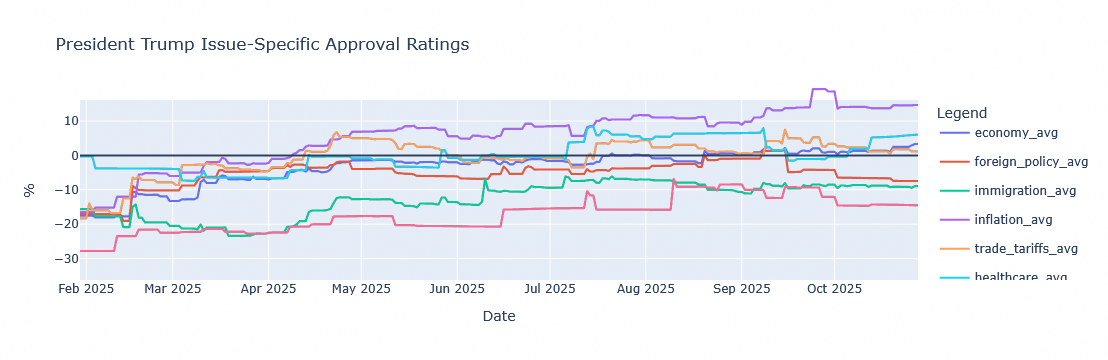

In [71]:
line = px.line(net_issues, x='Date', y=['economy_avg', 'foreign_policy_avg', 'immigration_avg', 'inflation_avg', 'trade_tariffs_avg', 'healthcare_avg',
                                       'crime_avg'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.add_hline(0)
fig.show()

In [72]:
net_issues.to_csv('net_approval_issues.csv')

In [73]:
def current_approval(data: pd.DataFrame, issue: str):
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    date = datetime.datetime.today()
#         try:
    pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
    yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
    no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
    yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
    no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
    
    return {'issue': issue, 'approve': yes_avg, 'disapprove': no_avg, 'approve_std': yes_std, 'disapprove_std': no_std}

In [74]:
all_issues = np.unique(approval['issue'])
all_issues

array(['abortion', 'agriculture', 'ai', 'ballroom', 'border_security',
       'cabinet', 'canada', 'charlie_kirk_death', 'childcare', 'china',
       'city_deployments', 'civil_liberties', 'civil_rights',
       'climate_change', 'consumer_protection', 'corruption', 'crime',
       'criminal_justice', 'cryptocurrency', 'cybersecurity',
       'dc_takeover', 'death_penalty', 'defense', 'dei', 'democracy',
       'deploying_military_us_cities', 'deportations', 'disaster_relief',
       'doge', 'economy', 'education', 'energy', 'environment',
       'epstein_files', 'executive_orders', 'federal_workforce',
       'flooding_recent', 'foreign_aid', 'foreign_policy', 'free_speech',
       'gas_prices', 'govt_management', 'govt_shutdown', 'govt_spending',
       'guns', 'healthcare', 'housing', 'immigration', 'inequality',
       'inflation', 'iran', 'israel', 'israel_iran_conflict',
       'israel_palestine', 'jan_6_handling', 'jobs',
       'judiciary_politicization', 'kilmar_abrego_garcia'

In [75]:
qual_issue_polls = approval.groupby(['issue']).agg('count').reset_index()[['issue', 'pollster']]
qual_issue_polls = qual_issue_polls.rename({'pollster': 'count'}, axis=1)
qual_issue_polls = qual_issue_polls[qual_issue_polls['count'] > 3]
all_qual_issues = qual_issue_polls['issue'].values
qual_issue_polls.head()

,issue,count
0,abortion,17
4,border_security,20
11,civil_liberties,8
12,civil_rights,18
13,climate_change,17


In [76]:
qual_issue_polls = approval[approval['issue'].isin(all_qual_issues)]
issues_qual = []
for iss in all_qual_issues:
  if np.unique(qual_issue_polls[qual_issue_polls['issue'] == iss]['pollster']).shape[0] >= 2:
      issues_qual.append(iss)

issues_qual

['abortion',
 'border_security',
 'civil_rights',
 'climate_change',
 'corruption',
 'crime',
 'democracy',
 'deportations',
 'disaster_relief',
 'economy',
 'education',
 'energy',
 'environment',
 'epstein_files',
 'federal_workforce',
 'foreign_policy',
 'govt_management',
 'govt_spending',
 'guns',
 'healthcare',
 'immigration',
 'inflation',
 'iran',
 'israel',
 'israel_iran_conflict',
 'israel_palestine',
 'military',
 'national_debt',
 'national_security',
 'race_relations',
 'russia',
 'taxes',
 'trade_tariffs',
 'ukraine',
 'unity']

In [77]:
approval['issue'].value_counts()[:15]

issue
economy             206
immigration         186
trade_tariffs       145
inflation           108
foreign_policy       80
healthcare           46
ukraine              38
crime                37
education            30
israel_palestine     29
govt_spending        26
border_security      20
civil_rights         18
taxes                18
climate_change       17
Name: count, dtype: int64

In [78]:
all_issues_approval = pd.DataFrame()

for issue in all_issues:
    row = current_approval(approval, issue)
    all_issues_approval = pd.concat([all_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [79]:
all_issues_approval['net'] = all_issues_approval['approve'] - all_issues_approval['disapprove']
all_issues_approval = all_issues_approval.sort_values(['net'], ascending=False)
all_issues_approval = all_issues_approval.reset_index().drop(['index'], axis=1)

In [80]:
all_issues_approval

,issue,approve,disapprove,approve_std,disapprove_std,net
0,middle_east,54.998284,24.004092,0.149351,0.356145,30.994192
1,border_security,51.922713,45.913099,2.961083,1.965019,6.009613
2,defense,50.000464,46.999536,0.000000,0.000000,3.000928
3,law_enforcement,43.000000,41.000000,0.000000,0.000000,2.000000
4,democracy,49.688214,48.153880,1.876607,1.299696,1.534334
...,...,...,...,...,...,...
81,pardons,27.249587,54.750413,0.000000,0.000000,-27.500826
82,inflation,32.992703,61.981222,2.802245,3.766378,-28.988519
83,stock_market,31.387369,66.612632,0.000000,0.000000,-35.225263
84,unity,31.489287,68.506532,0.089395,0.319897,-37.017245


In [81]:
all_qual_issues_approval = pd.DataFrame()

for issue in issues_qual:
    row = current_approval(approval, issue)
    all_qual_issues_approval = pd.concat([all_qual_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [82]:
all_qual_issues_approval['net'] = all_qual_issues_approval['approve'] - all_qual_issues_approval['disapprove']
all_qual_issues_approval = all_qual_issues_approval.sort_values(['net'], ascending=False)
all_qual_issues_approval = all_qual_issues_approval.reset_index().drop(['index'], axis=1)

In [83]:
len(issues_qual)

35

In [84]:
fig = px.bar(all_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()

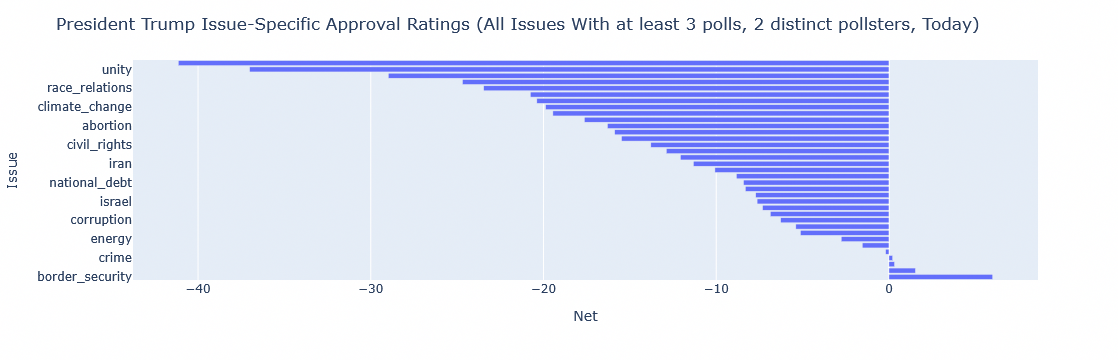

In [85]:
fig = px.bar(all_qual_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues With at least 3 polls, 2 distinct pollsters, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()